# Project 1: Building a Color Magnitude Diagram of the Milky Way Field 

NAME: 

UTEID: 

DATE:


Goal : Construct 3 color magnitude diagrams of 500,000+ random Milky Way Stars. These will include a:
1. Raw (reddend) color (bp-rp) vs absolute magnitude (M_G) diagram
2. De-reddend color(bp-rp)-magnitude (M_G) diagram
3. Raw (reddend) color (bp-rp)-magnitude (M_G) of stars with low extinction with E(BP-RP) < 0.05mag

Data sets: 
high_quality_gaia.fits [50 MB] = astrometry, photometry for 500,000+ random milky way stars with uncertainties in parallax better than 1%. Data location : https://utexas.box.com/s/x4kfcv97bdxrhwkxllm687wjo3u2ls54
Download and save to the SAME LOCATION as this file.


Lets begin by loading our libraries: 



In [1]:
#lets make a plots interactive
# %matplotlib widget 

#When converting the notebook to a pdf you may want to use %matplotlib inline! 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
import scipy.stats
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
import astropy.coordinates as apycord
import random
from cycler import cycler

#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
#--- added ONLY if you have LATEX installed otherwise comment out this!!!!-----
# p.rcParams['text.usetex']= True
# p.rcParams['mathtext.fontset']= 'custom'
# p.rcParams['mathtext.default']= 'rm'
# p.rcParams['axes.formatter.use_mathtext']=False
#-----------------------------------------------
# p.rcParams['font.size']= 15.0
# p.rcParams['axes.labelsize']=16.0
# p.rcParams['axes.unicode_minus']=False
# p.rcParams['xtick.major.size']=6
# p.rcParams['xtick.minor.size']=3
# p.rcParams['xtick.major.width']=1.5#2.0
# p.rcParams['xtick.minor.width']=1.0
# p.rcParams['axes.linewidth']=2.5
# p.rcParams['axes.titlesize']=20#'large'
# p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
# p.rcParams['ytick.labelsize']=20 #'x-large'
# p.rcParams['ytick.major.width']=2.0 #4
# p.rcParams['ytick.minor.width']=1.0 #2.0

## Loading the Data
Now lets load in the Dataset and see whats inside (i.e. print the column names)

In [2]:
T = Table.read('./high_quality_gaia.fits') #1 pt
T.colnames

['source_id',
 'ra',
 'dec',
 'l',
 'b',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'bp_rp',
 'ag_gspphot',
 'azero_gspphot',
 'ebpminrp_gspphot',
 'has_rvs',
 'parallax_over_error',
 'radial_velocity']

You should get something like the following columns
'source_id' = source id of the star

 'ra', = right acesnsion in deg 
 
 'dec', = declination in deg
 
 'l', = Galactic longitude in deg
 
 'b', = Galactic latitude in degree
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in degree
 
 'pmdec', proper motion in declination in deg
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
 
 'bp_rp', BP-RP
 
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 'has_rvs', has an RVS spectrum True or False
 
 'parallax_over_error', parallax/parallax_error
 
 'radial_velocity' = Radial Velocity in km/s
 

## Plot the Sky positions (in both Equatorial and Galactic coordinates) of stars in the Sample 


In order to do this we will need to RA, DEC (Equatorial), and l, b (Galactic) columns so lets grab those columns  and plot them up

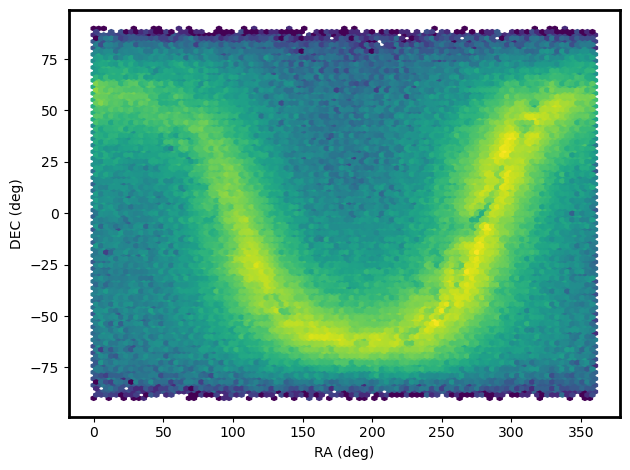

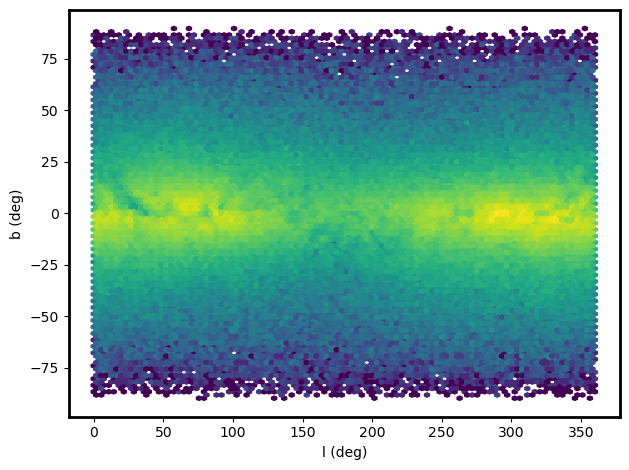

In [3]:
#grabbing RA,DEC,l,b 5pts
l = T['l']
b = T['b']
RA = T['ra']
DEC = T['dec']

#plotting Equatorial coordinates in a 2-d histogram. DO NOT USE PLOT because it will take a long time to render
p.figure()
p.hexbin(RA,DEC, bins='log',mincnt=1)
p.xlabel('RA (deg)');p.ylabel('DEC (deg)')
p.tight_layout()


#plotting Galactic coordinates in a 2-d histogram. DO NOT USE PLOT because it will take a long time to render


p.figure()
p.hexbin(l,b, bins='log',mincnt=1)
p.xlabel('l (deg)');p.ylabel('b (deg)')
p.tight_layout()



Ok this should allow us to answer Q1: Clearly they stars are located in all directions of the MW but mostly in the plane of the Galaxy.

Lets now compute the distance distribution

## Plot the Distance Distribution

First compute the heliocentric distances to each star then plot a histogram of the distance distribution using 50 bins.

After which compute the mean and median distances

The mean distance is 1362.17 pc
The median distance is 1194.06 pc


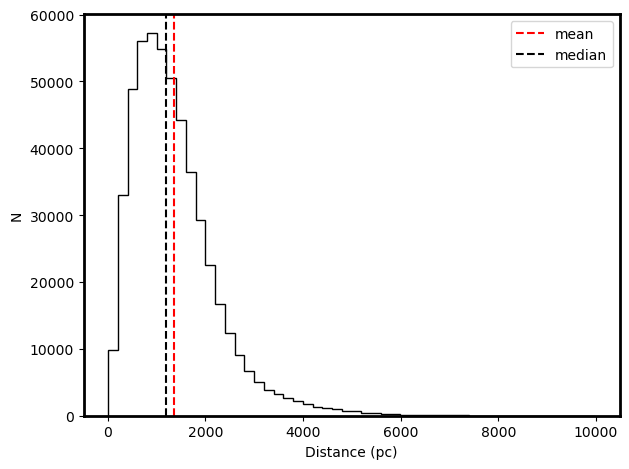

In [4]:
#lets start by computing the distances given the parallax 10pts
distance = 1000./T['parallax'] #note since parallax is in miliarcsecond 1/parallax is distance in kpc thus 1000/parallax is distance in parsec

#lets now plot it up.
p.figure()
p.hist(distance,bins=50, histtype='step')
p.xlabel('Distance (pc)')
p.ylabel('N')
med_dist = np.median(distance)
mean_dist = np.mean(distance)
print('The mean distance is %.2f pc'%mean_dist)
print('The median distance is %.2f pc'%med_dist)
p.axvline(x=mean_dist,ls='--',color='r',label='mean')
p.axvline(x=med_dist,ls='--',color='k',label='median')
p.legend()
p.tight_layout()

## Create the First Color Magnitude Diagram
With the color and magnitude in hand, lets now plot our first color magnitude diagram (raw). Since there are 500,000 points, use a 2-D histogram to make this plot. Don't forget to invert the y-axis since magnitudes go in the opposite directon

In [5]:
#lets pull down the color and magnitudes first 
BP = T['phot_bp_mean_mag'] #Blue bandpass magnitude in mag
RP = T['phot_rp_mean_mag'] #Red bandpass magnitude in mag
G = T['phot_g_mean_mag'] #Gaia G band magnitude in mag

#lets compute the color
BP_RP = BP-RP # (BP-RP) color NOTE this is also the bp_rp column

#lets now compute the absolute magnitude
absG = G - 5*(np.log10(distance)-1)

Now that we have computed the color and abs. magnitude lets now plot our first CMD!

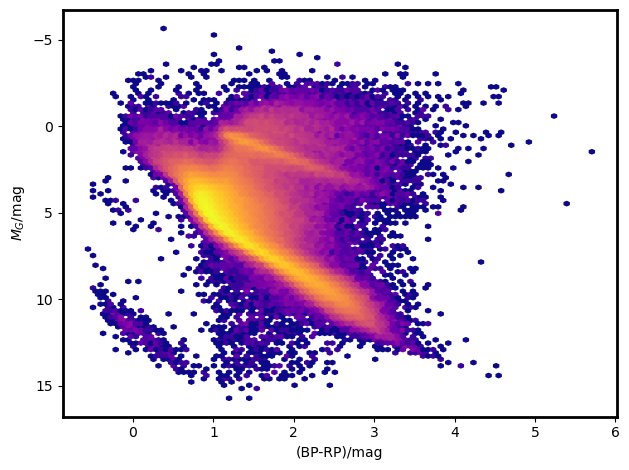

In [6]:
p.figure()
p.hexbin(BP_RP, absG, bins='log',mincnt=1,cmap='plasma')
p.xlabel('(BP-RP)/mag')
p.ylabel(r'$M_G$/mag')
p.gca().invert_yaxis()
p.tight_layout()
#--- dont forget to invert the y-axis since magnitudes go in the opposite directon

## Create the Second (de-reddend) Color Magnitude Diagram
With the first (raw) color and magnitude in hand, lets now plot our second color magnitude diagram that has been corrected for reddening and extinction. Since there are 500,000 points, use a 2-D histogram to make this plot. Don't forget to invert the y-axis since magnitudes go in the opposite directon

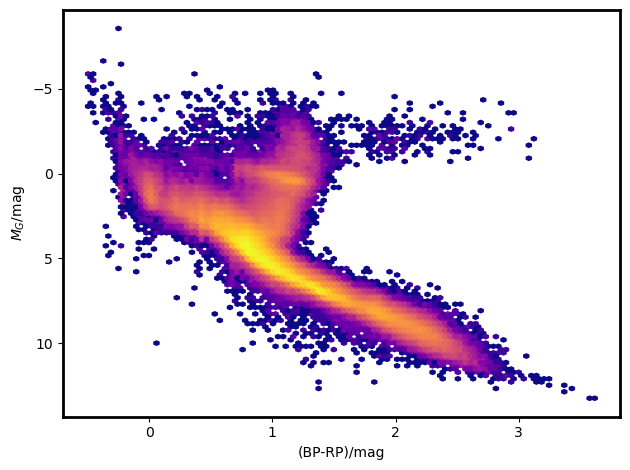

In [7]:
#lets start be pulling the color excess E(BP-RP) and extinction in G from the Gaia table 
E_BP_RP = T['ebpminrp_gspphot']
A_G = T['ag_gspphot']
#------

#now lets correct the above diagram for both extinction and reddening 

p.figure()
p.hexbin(BP_RP-E_BP_RP, absG-A_G, bins='log',mincnt=1,cmap='plasma')

#NOTE:  since things get redder to correct we must subtract the excess color
#NOTE2: since extinction makes things fainter we must subtract to make it brighter when account for extinction
p.xlabel('(BP-RP)/mag')
p.ylabel(r'$M_G$/mag')
p.gca().invert_yaxis()
p.tight_layout()
#--- dont forget to invert the y-axis since magnitudes go in the opposite directon

## Create the Final (low extinction) Color Magnitude Diagram
Lets now select only those stars where the color excess is low E(BP-RP) < 0.05mag.

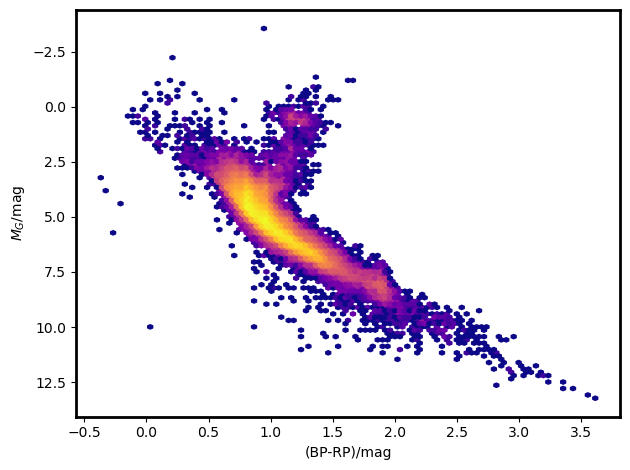

In [8]:
p.figure()
ok = np.where(E_BP_RP<0.05)[0] # lets find out where the E(BP-RP) < 0.05 mag
p.hexbin(BP_RP[ok],absG[ok], bins='log',mincnt=1,cmap='plasma')
p.xlabel('(BP-RP)/mag')
p.ylabel(r'$M_G$/mag')
p.gca().invert_yaxis()
p.tight_layout()
#--- dont forget to invert the y-axis since magnitudes go in the opposite directon

Q1: Are the stars located in one particular direction or all around the sky?

A1: The Stars are located all around the sky 

Q2: What is the mean distance to the stars in the sample (in pc) :

A2 : The mean distance is 1362.17 pc

Q3: What is the median distance to the stars in the sample (in pc):

A3: The median distance is 1194.06 pc

Q4: Are the median and mean the same? Why or why not?

A4: The mean and median are not the same. This is because the distance distribution is not Guassian but skewed towards larger values pulling the mean away to larger values than the median.

Q5: The de-reddened and low extinction Color magnitude diagrams should look similar! Do they? If not, why not?

A5: The low extinction plot is less well sampled (this is because there less stars that have low extinction compared to those which have extinction estimates). Additionally, the low exintciton plot is cleaner (e.g., the very red bright objects that shouldnt be in the 2nd CMD) and tighter compared (e.g., red clump) to the de-reddened plot. 

Q6 How many of these stars are observable (with airmass lower than 1.55) from McDonald Observatory (lat, long = 30.6797° N, 104.0247° W)? How do you know?

A6:


NOTE: 

To answer Q6 you will need to make use of the len() and np.where()
len() tells you how many elements are in an array and 
np.where( ((condition1) & (condition2)) | ((condition3)&(condition4)) ) determines the indices in an array where the condition is satisfied!
In the where function & is "and" and | = "or"
You task will be to write the condition appropriatly 

In [9]:
# add solution here (4 pts)
alt_S = (90-30.6797) + T['dec']
alt_N = 180 - (90-30.6797 + T['dec'])

#reminder that airmass = sec(z) = sec(90-altitude) thus sec(90-altitude) = 1.55
#This altitude is sec^-1(1.55) = 49.82 deg = 90-altitude = 90-49.82= 40.18


altitude_limit = 40.18 #put here the altitutde required to achieve an airmass less than 1.55

Num_stars = len(np.where( ((alt_N >= altitude_limit) & (alt_N <= 90)) | \
                         ((alt_S >= altitude_limit) & (alt_S <= 90))  )[0])
print('There %i stars that are observable with altitude > %.2f degrees'%(Num_stars,altitude_limit))

There 281614 stars that are observable with altitude > 40.18 degrees
